In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

In [2]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [11]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings.rename(columns= {'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace=True)
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [12]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [14]:
# 3. replace each null value in the dataframe with the string "Unknown"
killings= killings.fillna('Unknown')
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [83]:
# 4. How many killings were there so far in 2015?

killings.groupby('year')['name'].count()

year
2015    467
Name: name, dtype: int64

In [84]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender')['name'].count()

gender
Female     22
Male      445
Name: name, dtype: int64

In [85]:
# 6. How many killings were of unarmed people?
killings.groupby('armed')['name'].count()

armed
Disputed                2
Firearm               230
Knife                  68
No                    102
Non-lethal firearm     14
Other                  26
Unknown                 7
Vehicle                18
Name: name, dtype: int64

In [77]:
# 7. What percentage of all killings were unarmed?
killings.armed[killings.armed=='No'].count()*1.0/killings['armed'].count()

0.21841541755888652

In [31]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head()


CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [32]:
# 9. Show a value counts of deaths for each race
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

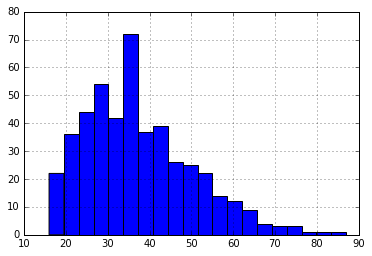

In [39]:
# 10. Display a histogram of ages of all killings
killings.age.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cadd0d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ce194d0>]], dtype=object)

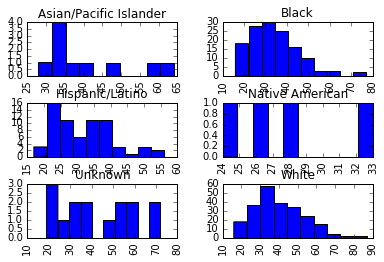

In [41]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race)


In [46]:
# 12. What is the average age of death by race?
killings.groupby('race').mean()['age']

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

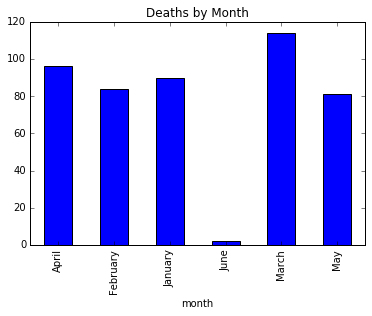

In [54]:
# 13. Show a bar chart with counts of deaths every month
killings.groupby('month').count()['name'].plot(kind='bar',color='b', title='Deaths by Month')

In [ ]:
###################
### Less Morbid ###
###################

In [2]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [3]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
majors.drop(majors.columns[[6, 1]], axis=1)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000
5,5,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,2070,0.031791,50000,35000,75000
6,6,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,264,0.050867,63000,39400,88000
7,7,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,261,0.039230,52000,35000,75000
8,8,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,4736,0.051290,52000,38000,75000
9,9,FORESTRY,Agriculture & Natural Resources,69447,48228,2144,0.042563,58000,40500,80000


In [4]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0                       0
Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [10]:
# 3. What are the top 10 highest paying majors?
majors[['Major','P75th']].groupby('Major').mean().sort_index(by='P75th',ascending = False).head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,P75th
Major,
PETROLEUM ENGINEERING,210000
MATHEMATICS AND COMPUTER SCIENCE,136000
NUCLEAR ENGINEERING,128000
GEOLOGICAL AND GEOPHYSICAL ENGINEERING,125000
NAVAL ARCHITECTURE AND MARINE ENGINEERING,125000
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION,125000
MINING AND MINERAL ENGINEERING,124000
METALLURGICAL ENGINEERING,123000
CHEMICAL ENGINEERING,120000


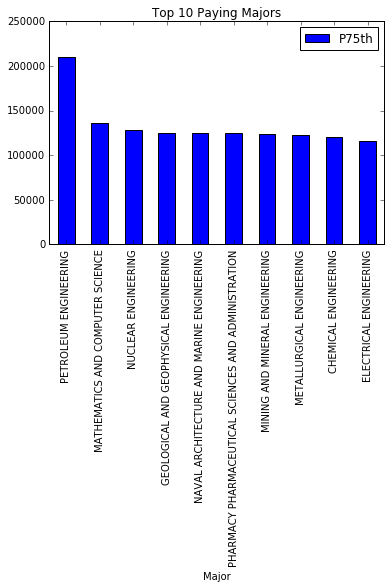

In [13]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!
majors[['Major','P75th']].groupby('Major').mean().sort_values(by='P75th',ascending = False).head(10).plot(kind='bar',color='b', title='Top 10 Paying Majors')

In [17]:
# 5. What is the average median salary for each major category?
majors[['Major_category','Median']].groupby('Major_category').mean()

,Median
Major_category,
Agriculture & Natural Resources,55000.000000
Arts,43525.000000
Biology & Life Science,50821.428571
Business,60615.384615
Communications & Journalism,49500.000000
Computers & Mathematics,66272.727273
Education,43831.250000
Engineering,77758.620690
Health,56458.333333


In [22]:
# 6. Show only the top 5 paying major categories
majors[['Major_category','Median']].groupby('Major_category').mean().sort_values(by='Median', ascending=False).head()

,Median
Major_category,
Engineering,77758.620690
Computers & Mathematics,66272.727273
Physical Sciences,62400.000000
Business,60615.384615
Health,56458.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d843850>]], dtype=object)

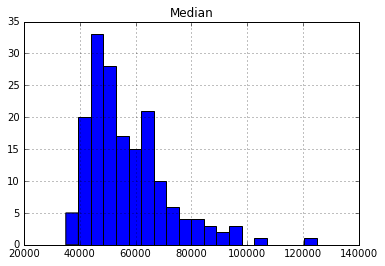

In [27]:
# 7. Plot a histogram of the distribution of median salaries
majors[['Major','Median']].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d783dd0>]], dtype=object)

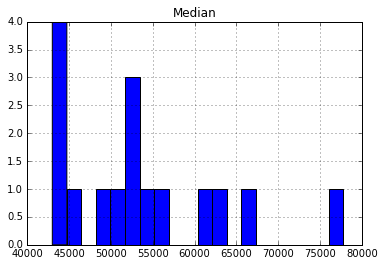

In [28]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors[['Major_category','Median']].groupby('Major_category').mean().hist(bins=20)

In [29]:
# 9. What are the top 10 most UNemployed majors?
majors[['Major','Unemployed']].sort_values(by='Unemployed', ascending=False).head(10)

,Major,Unemployed
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
158,GENERAL BUSINESS,85626
114,PSYCHOLOGY,79066
159,ACCOUNTING,75379
13,COMMUNICATIONS,54390
73,ENGLISH LANGUAGE AND LITERATURE,52248
164,MARKETING AND MARKETING RESEARCH,51839
132,POLITICAL SCIENCE AND GOVERNMENT,40376
25,GENERAL EDUCATION,38742
78,BIOLOGY,36757


In [34]:
# What are the unemployment rates?
majors[['Major','Unemployed','Unemployment_rate']].sort_values(by='Unemployed', ascending=False)

,Major,Unemployed,Unemployment_rate
161,BUSINESS MANAGEMENT AND ADMINISTRATION,147261,0.058865
158,GENERAL BUSINESS,85626,0.051378
114,PSYCHOLOGY,79066,0.069667
159,ACCOUNTING,75379,0.053415
13,COMMUNICATIONS,54390,0.064360
73,ENGLISH LANGUAGE AND LITERATURE,52248,0.068645
164,MARKETING AND MARKETING RESEARCH,51839,0.055033
132,POLITICAL SCIENCE AND GOVERNMENT,40376,0.069374
25,GENERAL EDUCATION,38742,0.043904
78,BIOLOGY,36757,0.059301


In [38]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
majors[['Major_category','Unemployed','Unemployment_rate']].groupby('Major_category').mean().sort_values(by='Unemployed', ascending=False).head(10)

,Unemployed,Unemployment_rate
Major_category,,
Business,33415.153846,0.054496
Communications & Journalism,25299.750000,0.069125
Social Science,14683.333333,0.065686
Arts,13015.625000,0.087601
Humanities & Liberal Arts,11942.400000,0.069429
Psychology & Social Work,11578.444444,0.077867
Law & Public Policy,8609.800000,0.067854
Education,7833.500000,0.046762
Computers & Mathematics,7270.363636,0.059437


In [49]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate']=majors['Employed']/majors['Total']


In [50]:
# 12. Create a "sample_unemployment_rate" colun
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate']=1-majors['sample_employment_rate']
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,EmployedR,sample_employment_rate,sample_unemployment_rate
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000,0.018908,0.704225,0.295775
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000,0.023771,0.806338,0.193662
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000,0.024179,0.775173,0.224827
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000,0.034950,0.783948,0.216052
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000,0.036820,0.711738,0.288262


In [ ]:
###################
### More Tasty ###
###################

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [73]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [74]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92,20140114,Routine - Unscheduled
4,19,94,20141110,Routine - Unscheduled


In [75]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [82]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
firstJ=businesses.join(inspections[['Score','date','type']], on='business_id', how='left', lsuffix='', rsuffix='', sort=False)
firstJ
restaurant_scores=firstJ.join(violations, on='business_id', how='left', lsuffix='', rsuffix='', sort=False)


ValueError: columns overlap but no suffix specified: Index([u'business_id', u'date'], dtype='object')

In [ ]:
# 2 Which ten business have had the most inspections?

In [ ]:
# 3 Group and count the inspections by type

In [ ]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

In [ ]:
# 5 Which zip code contains the most high risk violations?

In [ ]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [ ]:
# 7 Examining the descriptions, what is the most common violation?

In [ ]:
# 8 What street has the best (safest) restaurants to dine out at?

In [ ]:
# 9 Create a hist of the scores with 10 bins

In [ ]:
# 8 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/